***Stroke Prediction Dataset***: This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Bibliotecas

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [59]:
FIG_DIR = '../figures/'

Carregamento e informação dos dados 

In [32]:
df = pd.read_csv('..\\data\\raw\\data-stroke\\healthcare-dataset-stroke-data.csv', encoding='utf-8') 

print(f"\nNumber of instances: {df.shape[0]}")
print(f"Number of attributes: {df.shape[1]}")


Number of instances: 5110
Number of attributes: 12


In [33]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [97]:
attributes_table = [
    {"Variable Name": "id", "Role": "Identifier", "Type": "Integer", "Demographic": "-", 
     "Description": "Unique identifier for each patient", "Units": "-", "Missing Values": "no"},
    
    {"Variable Name": "gender", "Role": "Feature", "Type": "Categorical", "Demographic": "Sex", 
     "Description": "Gender of the patient (Male, Female or Other)", "Units": "-", "Missing Values": "no"},
    
    {"Variable Name": "age", "Role": "Feature", "Type": "Numeric", "Demographic": "Age", 
     "Description": "Age of the patient", "Units": "years", "Missing Values": "no"},
    
    {"Variable Name": "hypertension", "Role": "Feature", "Type": "Binary", "Demographic": "Health", 
     "Description": "1 if the patient has hypertension, 0 otherwise", "Units": "-", "Missing Values": "no"},
    
    {"Variable Name": "heart_disease", "Role": "Feature", "Type": "Binary", "Demographic": "Health", 
     "Description": "1 if the patient has any heart disease, 0 otherwise", "Units": "-", "Missing Values": "no"},
    
    {"Variable Name": "ever_married", "Role": "Feature", "Type": "Categorical", "Demographic": "Personal", 
     "Description": "Marital status of the patient (Yes or No)", "Units": "-", "Missing Values": "no"},
    
    {"Variable Name": "work_type", "Role": "Feature", "Type": "Categorical", "Demographic": "Occupation", 
     "Description": "Type of work (children, Govt_job, Never_worked, Private, Self-employed)", "Units": "-", "Missing Values": "no"},
    
    {"Variable Name": "Residence_type", "Role": "Feature", "Type": "Categorical", "Demographic": "Residence", 
     "Description": "Type of residence (Rural or Urban)", "Units": "-", "Missing Values": "no"},
    
    {"Variable Name": "avg_glucose_level", "Role": "Feature", "Type": "Numeric", "Demographic": "Health", 
     "Description": "Average glucose level in blood", "Units": "mg/dL", "Missing Values": "no"},
    
    {"Variable Name": "bmi", "Role": "Feature", "Type": "Numeric", "Demographic": "Health", 
     "Description": "Body Mass Index of the patient", "Units": "kg/m²", "Missing Values": "yes"},
    
    {"Variable Name": "smoking_status", "Role": "Feature", "Type": "Categorical", "Demographic": "Behavior", 
     "Description": "Smoking status (formerly smoked, never smoked, smokes, or Unknown)", "Units": "-", "Missing Values": "no"},
    
    {"Variable Name": "stroke", "Role": "Target", "Type": "Binary", "Demographic": "Health", 
     "Description": "1 if the patient had a stroke, 0 otherwise", "Units": "-", "Missing Values": "no"},
]

# Criando o DataFrame
df_attributes = pd.DataFrame(attributes_table)

# Exibindo o DataFrame
df_attributes


,Variable Name,Role,Type,Demographic,Description,Units,Missing Values
0,id,Identifier,Integer,-,Unique identifier for each patient,-,no
1,gender,Feature,Categorical,Sex,"Gender of the patient (Male, Female or Other)",-,no
2,age,Feature,Numeric,Age,Age of the patient,years,no
3,hypertension,Feature,Binary,Health,"1 if the patient has hypertension, 0 otherwise",-,no
4,heart_disease,Feature,Binary,Health,"1 if the patient has any heart disease, 0 othe...",-,no
5,ever_married,Feature,Categorical,Personal,Marital status of the patient (Yes or No),-,no
6,work_type,Feature,Categorical,Occupation,"Type of work (children, Govt_job, Never_worked...",-,no
7,Residence_type,Feature,Categorical,Residence,Type of residence (Rural or Urban),-,no
8,avg_glucose_level,Feature,Numeric,Health,Average glucose level in blood,mg/dL,no
9,bmi,Feature,Numeric,Health,Body Mass Index of the patient,kg/m²,yes


## Tratamento dos dados

1. Verificando se há valores faltantes

In [34]:
print('Missing Values per attribute:', df.isnull().sum())

Missing Values per attribute: id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


2. Excluímos as linhas que tem valores faltantes de bmi pois correspondem a apenas 4% dos dados.

In [35]:
df = df.dropna(subset=['bmi'])

print('Missing Values per attribute:', df.isnull().sum())

Missing Values per attribute: id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


3. BMI tem valores anormais: Valores acima de 60 são anormais para bmi, portanto arredondamos todos os valores acima desse valor para 60.

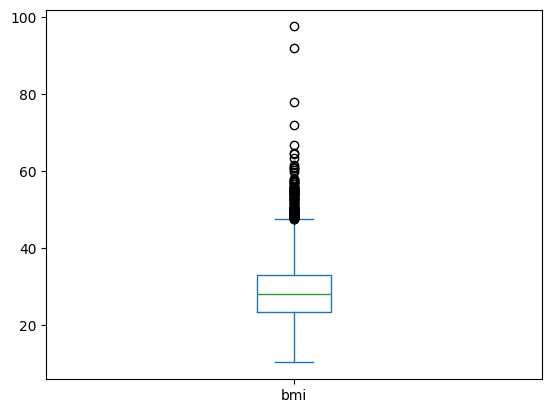

In [36]:
df['bmi'].plot(kind='box')
plt.show()

In [40]:
# Verifica quantos valores de BMI são maiores que 60
bmi_outliers = df.loc[df['bmi'] > 60]

# Exibe a quantidade de valores anormais de BMI
print(f'Outliers number: {len(bmi_outliers)}') 

# Substitui valores de BMI maiores que 60 por 60
df.loc[df['bmi'] > 60, 'bmi'] = 60

# Verifica se ainda existem valores maiores que 60
print(f'Number of bmi over 60: {df.loc[df["bmi"]>60].shape[0]}')

Outliers number: 13
Number of bmi over 60: 0


4. Verificando o formato dos dados. Percebemos que a idade está em float64, podemos transformá-la para int64.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


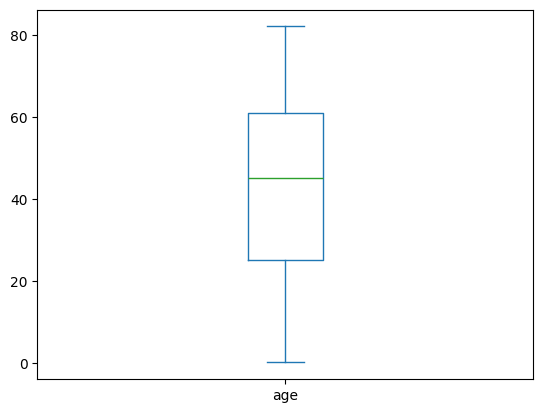

In [ ]:
import matplotlib.pyplot as plt
df['age'].plot(kind='box')
plt.show()

In [45]:
df['age'] = df['age'].astype('int64')

C:\Users\ferna\AppData\Local\Temp\ipykernel_27772\3577367295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype('int64')


## Exploração simples dos dados

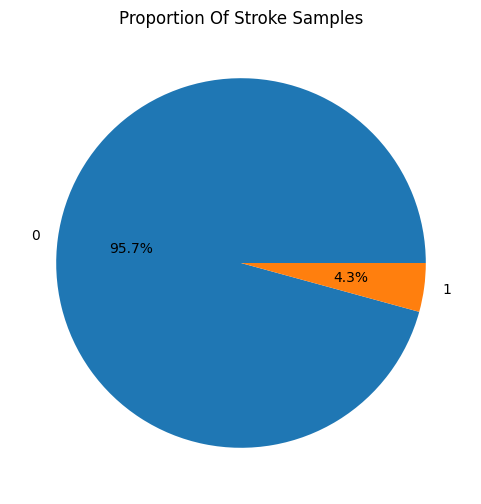

In [55]:
counts = df['stroke'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Proportion Of Stroke Samples')
plt.show()

# Conclusão: dataset desbalanceado, poucas ocorrências de AVC.

Distribuição dos atributos

Idade:  
- Os dados estão concentrados em 20 e 60 anos.
- As pessoas que sofreram AVC tem uma idade mais avançada, entre 60 e 80 anos.

Ou seja, idade é um fator muito importante para riscos altos de AVC.

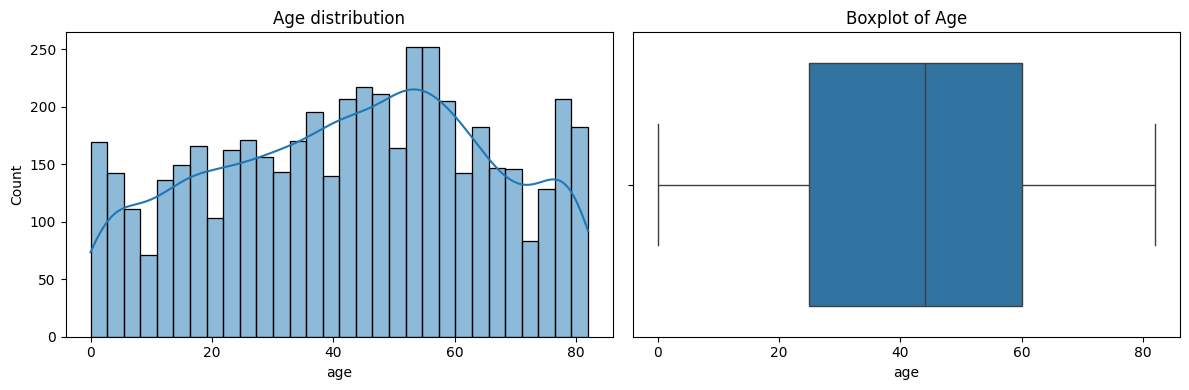

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['age'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Age distribution')

sns.boxplot(x='age', data=df, ax=ax[1])
ax[1].set_title('Boxplot of Age')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'stroke distribution by age')

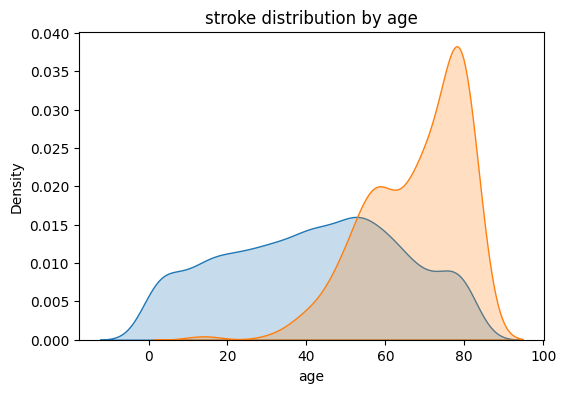

In [75]:
plt.figure(figsize=(6,4))
sns.kdeplot(df.loc[df['stroke']==0, 'age'], label='no stroke', fill=True)
sns.kdeplot(df.loc[df['stroke']==1, 'age'], label='stroke', fill=True)
plt.title('stroke distribution by age')


In [99]:
print(f"Stroke mean age: {df.loc[df['stroke']==1, 'age'].mean():.2f}")

Stroke mean age: 67.71


Sobre os níveis de glicose e bmi concluímos que:
- Homens que têm AVC parecem apresentar níveis de glicose mais altos e mais extremos do que mulheres.
- Isso pode indicar maior prevalência de diabetes desregulada entre homens que tiveram AVC.

Let's have a look at the distribution of stroke patients' average glucose level:


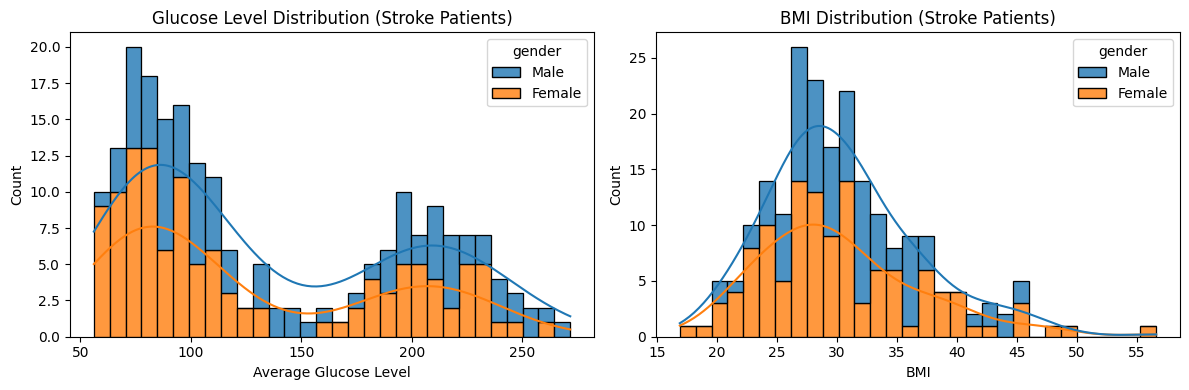

In [96]:
print("Let's have a look at the distribution of stroke patients' average glucose level:")

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# --- Glucose ---
sns.histplot(
    data=df[df["stroke"] == 1],
    x="avg_glucose_level",
    hue="gender",
    multiple="stack",
    kde=True,
    bins=30,
    alpha=0.8,
    edgecolor="black",
    ax=ax[0]
)
ax[0].set_title("Glucose Level Distribution (Stroke Patients)")
ax[0].set_xlabel("Average Glucose Level")
ax[0].set_ylabel("Count")

# --- BMI ---
sns.histplot(
    data=df[df["stroke"] == 1],
    x="bmi",
    hue="gender",
    multiple="stack",
    kde=True,
    bins=30,
    alpha=0.8,
    edgecolor="black",
    ax=ax[1]
)
ax[1].set_title("BMI Distribution (Stroke Patients)")
ax[1].set_xlabel("BMI")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


Sexo: 
- Tem mais mulheres que homens no nosso dataset.
- A proporção de AVC em mulheres é maior que em homens.

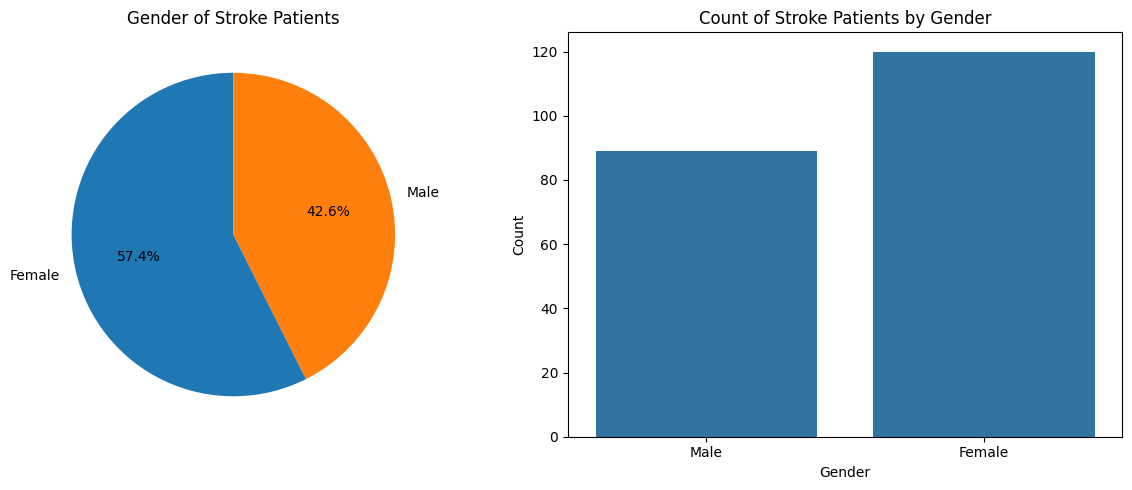

In [84]:
stroke_df = df[df["stroke"] == 1]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))


stroke_gender_counts = stroke_df["gender"].value_counts()

ax[0].pie(
    stroke_gender_counts,
    labels=stroke_gender_counts.index,
    autopct="%.1f%%",
    startangle=90
)
ax[0].set_title("Gender of Stroke Patients")

sns.countplot(
    data=stroke_df,
    x="gender",
    ax=ax[1]
)
ax[1].set_title("Count of Stroke Patients by Gender")
ax[1].set_xlabel("Gender")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


Hipertensão:
- Quase 500 indivíduos possuíam hipertensão e uma taxa pequena desses indivíduos sofreram AVC.


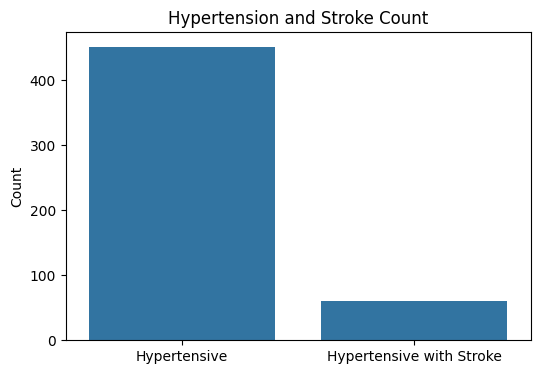

In [101]:
total_hyper = df[df["hypertension"] == 1].shape[0]
stroke_hyper = df[(df["hypertension"] == 1) & (df["stroke"] == 1)].shape[0]

aux = pd.DataFrame({
    "Category": ["Hypertensive", "Hypertensive with Stroke"],
    "Count": [total_hyper, stroke_hyper]
})

plt.figure(figsize=(6,4))
sns.barplot(data=aux, x="Category", y="Count")
plt.title("Hypertension and Stroke Count")
plt.ylabel("Count")
plt.xlabel("")
plt.show()


Casamento, fumante e residência e tipo de trabalho:

As visualizações indicam que pessoas casadas apresentam um risco de AVC um pouco maior, mas a diferença é pequena, cerca de 5%. A localização da residência praticamente não influencia — moradores de áreas rurais e urbanas têm chances semelhantes de sofrer AVC. Já o tabagismo mostra impacto mais evidente: ex-fumantes aparecem como o grupo com maior risco. Quanto à ocupação, pessoas autônomas parecem ter maior probabilidade de AVC, enquanto a maioria dos casos registrados ocorre entre trabalhadores do setor privado, possivelmente associado ao estresse do trabalho.

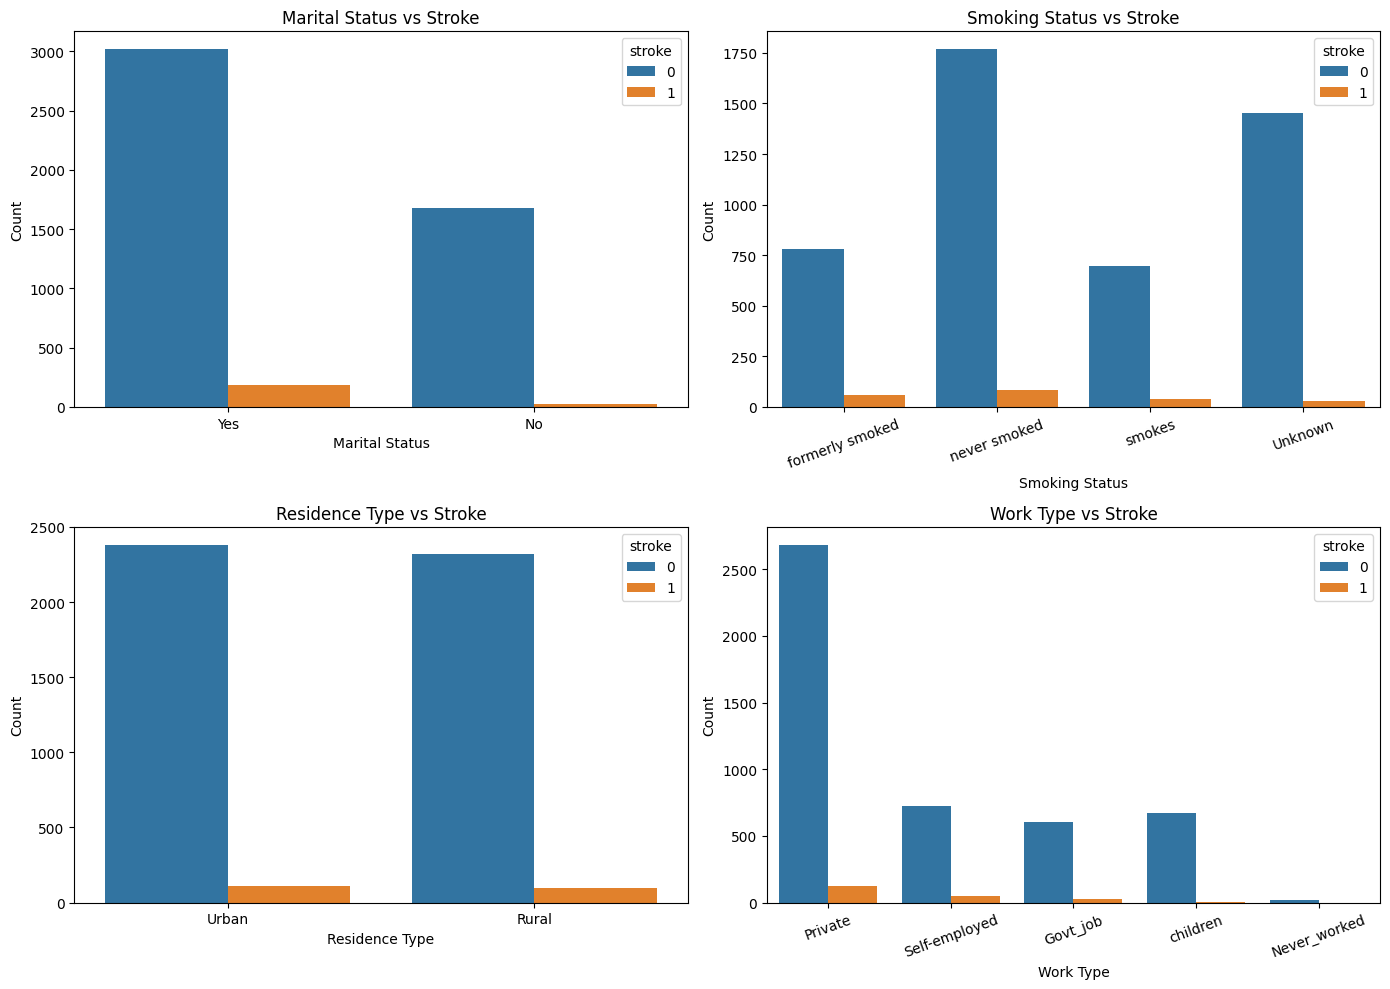

In [102]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# --- 1. Married vs Stroke ---
sns.countplot(
    data=df,
    x="ever_married",
    hue="stroke",
    ax=ax[0,0]
)
ax[0,0].set_title("Marital Status vs Stroke")
ax[0,0].set_xlabel("Marital Status")
ax[0,0].set_ylabel("Count")


# --- 2. Smoking Status vs Stroke ---
sns.countplot(
    data=df,
    x="smoking_status",
    hue="stroke",
    ax=ax[0,1]
)
ax[0,1].set_title("Smoking Status vs Stroke")
ax[0,1].set_xlabel("Smoking Status")
ax[0,1].set_ylabel("Count")
ax[0,1].tick_params(axis='x', rotation=20)


# --- 3. Residence Type vs Stroke ---
sns.countplot(
    data=df,
    x="Residence_type",
    hue="stroke",
    ax=ax[1,0]
)
ax[1,0].set_title("Residence Type vs Stroke")
ax[1,0].set_xlabel("Residence Type")
ax[1,0].set_ylabel("Count")


# --- 4. Work Type vs Stroke ---
sns.countplot(
    data=df,
    x="work_type",
    hue="stroke",
    ax=ax[1,1]
)
ax[1,1].set_title("Work Type vs Stroke")
ax[1,1].set_xlabel("Work Type")
ax[1,1].set_ylabel("Count")
ax[1,1].tick_params(axis='x', rotation=20)


plt.tight_layout()
plt.show()


Doença cardíaca:
- Maioria das pessoas que sofreram AVC não possem doenças cardíacas. 


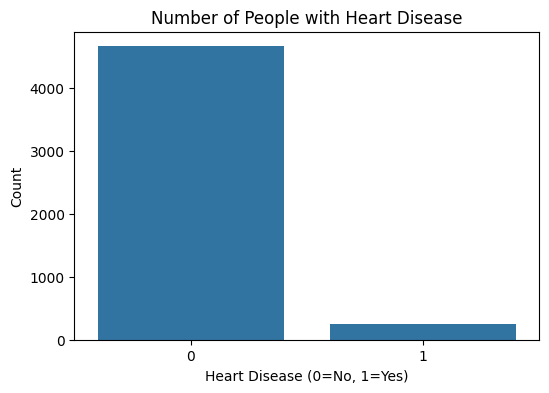

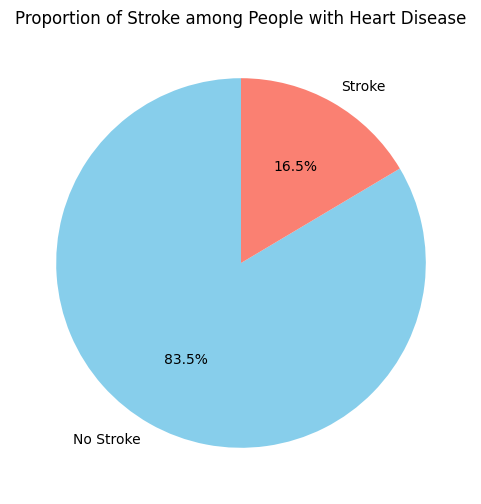

In [110]:
heart_counts = df['heart_disease'].value_counts()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='heart_disease')
plt.title('Number of People with Heart Disease')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

heart_stroke = df[df['heart_disease']==1]['stroke'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,6))
plt.pie(heart_stroke, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', startangle=90, colors=['skyblue','salmon'])
plt.title('Proportion of Stroke among People with Heart Disease')
plt.show()


## Perguntas

1. Quais grupos populacionais deveriam receber prioridade em campanhas de prevenção?
- R = Os dados (visualização de dados) mostram que a incidência de AVC aumenta de forma marcante com a idade, especialmente entre 60 e 80 anos. Além disso, indivíduos com diabetes apresentam maior proporção de casos. Portanto, campanhas de prevenção deveriam priorizar idosos, pessoas diabéticas e com sobrepeso.

2. Que fatores devem ser mais controlados para a diminuição do risco de AVC?
- R = Os dados mostram que a incidência de AVC aumenta de forma marcante com a idade. Além disso, indivíduos com hipertensão, doença cardíaca e histórico de tabagismo apresentam uma proporção não muito significativa mas acentuada de casos. Portanto, campanhas de prevenção deveriam priorizar idosos, pessoas hipertensas, pacientes com doenças cardíacas e fumantes ou ex-fumantes

3. Se fossem implementadas uma triagem automatizada quais variáveis deveriam ser medidas?
- R = As variáveis mais relevantes para uma triagem automática são aquelas que, no dataset, mostraram maior relação com o risco de AVC: idade, hipertensão, doença cardíaca, nível médio de glicose, bmi e status de tabagismo. Essas informações são fáceis de obter, clinicamente importantes e permitem identificar rapidamente pacientes com maior probabilidade de desenvolver AVC.

4. O risco de ter uma AVC aumenta com a idade?

- R = A idade média dos pacientes que sofreram AVC é de aproximadamente 67 anos, e o gráfico mostra que o risco cresce lentamente até os 50 anos, acelera a partir dos 60 e aumenta muito rapidamente após os 75 — indicando que a idade é um fator decisivo.

C:\Users\ferna\AppData\Local\Temp\ipykernel_27772\1124348123.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



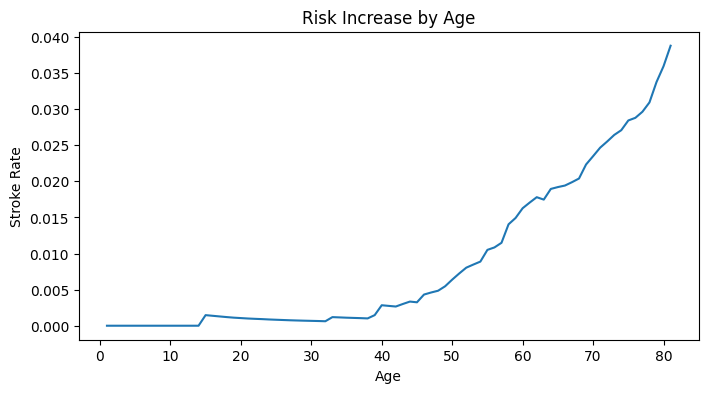

In [103]:
df["age"] = df["age"].astype(int)

rate = []
ages = range(df["age"].min(), df["age"].max())

for age in ages:
    subset = df[df["age"] < age]
    rate.append(subset["stroke"].mean())

plt.figure(figsize=(8,4))
sns.lineplot(x=list(ages), y=rate)

plt.title("Risk Increase by Age")
plt.xlabel("Age")
plt.ylabel("Stroke Rate")

plt.show()


5. Ter hipertensão e doença cardíaca impacta no risco de AVC? Se sin, entre essas comorbidades, qual é mais impactante para o risco de AVC?
- R = Sim. O heatmap mostra que tanto a hipertensão quanto a doença cardíaca aumentam o risco de AVC, mas a doença cardíaca é o fator mais impactante quando analisada isoladamente. Além disso, quando as duas comorbidades aparecem juntas, o risco de AVC se torna ainda maior, indicando um efeito combinado que intensifica a probabilidade de AVC. Além disso, como vimos anteriormente, o risco de hipertensão aumenta com o avanço da idade, que também é um fator crucial.

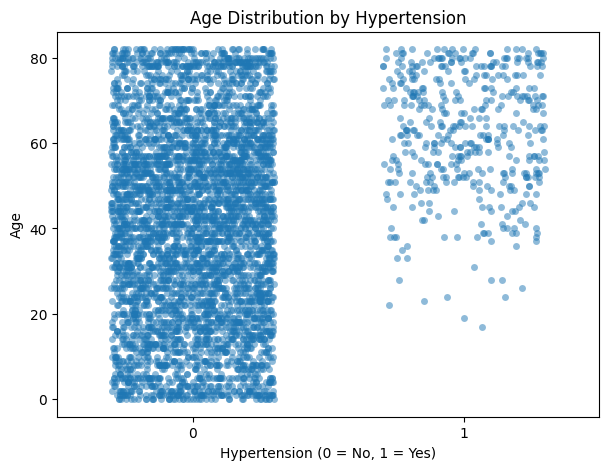

In [107]:
plt.figure(figsize=(7,5))
sns.stripplot(x='hypertension', y='age', data=df, jitter=0.3, alpha=0.5)
plt.title('Age Distribution by Hypertension')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

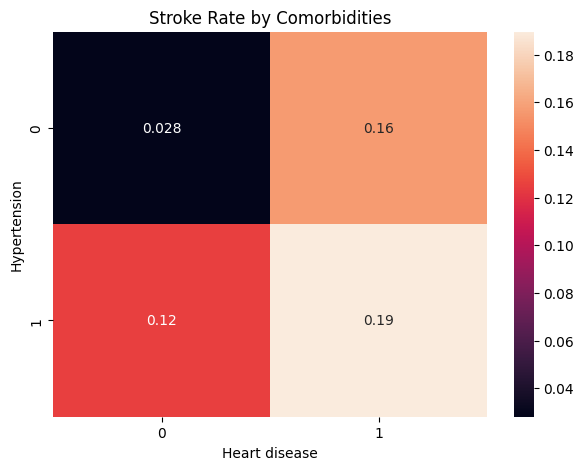

In [108]:
pivot = df.pivot_table(values='stroke', index='hypertension', columns='heart_disease', aggfunc='mean')

plt.figure(figsize=(7,5))
sns.heatmap(pivot, annot=True)
plt.title("Stroke Rate by Comorbidities")
plt.xlabel("Heart disease")
plt.ylabel("Hypertension")
plt.show()

6. O fator diabetes está relacionado ao aumento do risco de AVC?
- R = O diabetes compromete o sistema circulatório ao causar danos aos vasos sanguíneos, aumentar a pressão arterial e favorecer processos inflamatórios. Esses fatores tornam o cérebro mais vulnerável a eventos isquêmicos e hemorrágicos.

Além disso, na visualização realizada com os dados, observamos que os pacientes que sofreram AVC apresentaram níveis médios de glicose (avg_glucose_level) significativamente mais elevados, reforçando essa relação entre descontrole glicêmico e maior probabilidade de AVC.

C:\Users\ferna\AppData\Local\Temp\ipykernel_27772\3435426412.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




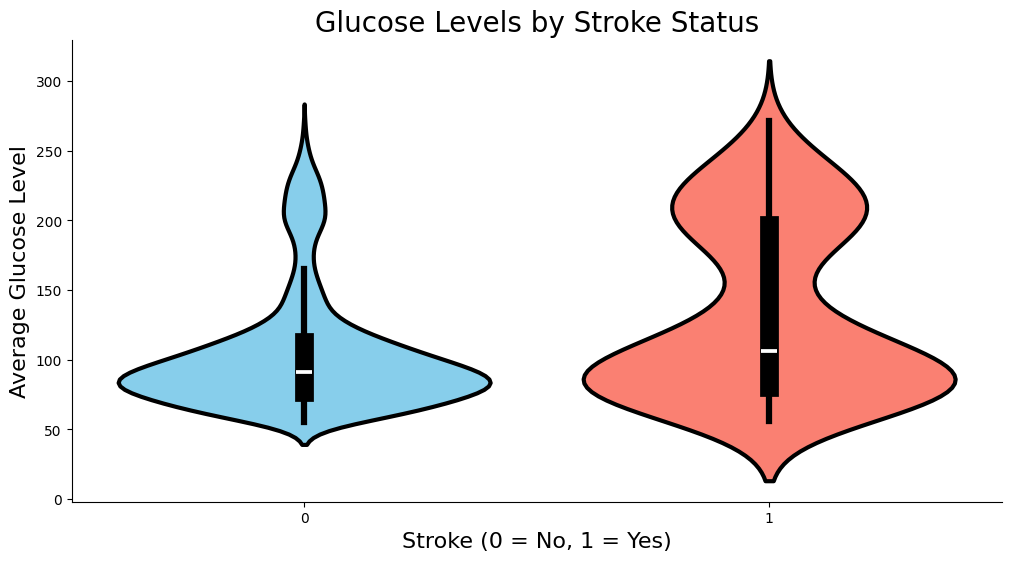

In [113]:
plt.figure(figsize=(12,6))

sns.violinplot(
    data=df,
    x='stroke',
    y='avg_glucose_level',
    palette=['skyblue', 'salmon'],
    saturation=1,
    linewidth=3,
    edgecolor="black"
)

plt.title('Glucose Levels by Stroke Status', fontsize=20)
plt.xlabel('Stroke (0 = No, 1 = Yes)', fontsize=16)
plt.ylabel('Average Glucose Level', fontsize=16)

sns.despine()
plt.show()
